 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/reinforcement-learning/dp_rl/hw1_notebook.ipynb#Dynamic-programming" data-toc-modified-id="Dynamic-programming-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dynamic programming</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/reinforcement-learning/dp_rl/hw1_notebook.ipynb#Discrete-MDP-model" data-toc-modified-id="Discrete-MDP-model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Discrete MDP model</a></span></li><li><span><a href="http://localhost:8888/notebooks/reinforcement-learning/dp_rl/hw1_notebook.ipynb#Value-iteration" data-toc-modified-id="Value-iteration-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Value iteration</a></span></li><li><span><a href="http://localhost:8888/notebooks/reinforcement-learning/dp_rl/hw1_notebook.ipynb#Policy-iteration" data-toc-modified-id="Policy-iteration-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Policy iteration</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/reinforcement-learning/dp_rl/hw1_notebook.ipynb#Reinforcement-learning" data-toc-modified-id="Reinforcement-learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reinforcement learning</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/reinforcement-learning/dp_rl/hw1_notebook.ipynb#GridWorld-environment" data-toc-modified-id="GridWorld-environment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>GridWorld environment</a></span></li><li><span><a href="http://localhost:8888/notebooks/reinforcement-learning/dp_rl/hw1_notebook.ipynb#Policy-evaluation" data-toc-modified-id="Policy-evaluation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Policy evaluation</a></span></li><li><span><a href="http://localhost:8888/notebooks/reinforcement-learning/dp_rl/hw1_notebook.ipynb#Policy-optimization" data-toc-modified-id="Policy-optimization-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Policy optimization</a></span></li></ul></li></ul></div>

In [1]:
# Uncomment to install the following packages
#!pip install tqdm
#!pip install seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import time
import sys
import os

%matplotlib inline

from numpy.linalg import norm

In [3]:
%load_ext autoreload

%autoreload 2

In [3]:
# Path to the scripts gridrender, gridworld, mdp and rl
sys.path.append(r"C:\Users\Nasser Benab\Documents\git\reinforcement-learning\dp_rl")

# Dynamic programming 

In [4]:
from mdp import *

##  Discrete MDP model

In [5]:
# Available states
X = ["s0", "s1", "s2"]

In [6]:
# Availabe actions
A = ["a0", "a1"]

In [7]:
# Reward matrix
R = np.array([[-0.4, 0], [2, 0], [-1, -0.5]])
R

array([[-0.4,  0. ],
       [ 2. ,  0. ],
       [-1. , -0.5]])

In [8]:
# Dynamics
P = np.array([[[0.45, 0, 0.55], [0, 0, 1], [0.6, 0, 0.4]], [[0, 0, 1], [0.5, 0.4, 0.1], [0, 0.9, 0.1]]])
P


array([[[ 0.45,  0.  ,  0.55],
        [ 0.  ,  0.  ,  1.  ],
        [ 0.6 ,  0.  ,  0.4 ]],

       [[ 0.  ,  0.  ,  1.  ],
        [ 0.5 ,  0.4 ,  0.1 ],
        [ 0.  ,  0.9 ,  0.1 ]]])

In [9]:
# Initialize the MDP model
mdp = MDP(X, A, P, R)

## Value iteration 

In [10]:
# Compute the 0.01 - greedy policy using value iteration
V0 = np.zeros(mdp.n_states)
greedy_policy, Vhistory = mdp.value_iterate(0.01, V0)
greedy_policy

Iteration n°10
Iteration n°20
Iteration n°30
Iteration n°40
Iteration n°50
Iteration n°60
Iteration n°70
Iteration n°80
Number of iterations with epsilon = 0.01: 84


['a1', 'a0', 'a1']

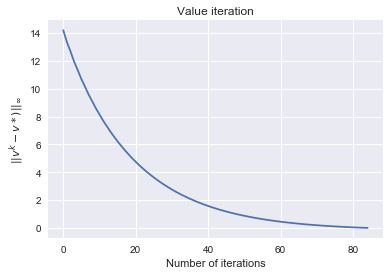

In [11]:
# Plot the gap between the value function at each iteration and the optimal 
# value function (norm infinity)
gaps = [norm(V-Vhistory[-1], np.inf) for V in Vhistory]
plt.plot(gaps)
plt.ylabel("$||v^k - v*)||_\infty$")
plt.xlabel("Number of iterations")
plt.title("Value iteration")
plt.show()

## Policy iteration 

In [12]:
# Compute the greedy policy using policy iteration
policy0 = [0, 0, 0]
mdp.policy_iterate(policy0)

Number of iterations = 3


['a1', 'a0', 'a1']

> The policy iteration algorithm converges much faster than the value iteration one (3 against 84 iterations respectively). However, for the policy iteration, each iteration requires a full policy evaluation that can be expensive. 

> For the value iteration, eventhough there are a lot of iterations, each one is very efficient. However the convergence is only asymptotic for this algorithm.

# Reinforcement learning

In [13]:
from gridworld import *

## GridWorld environment

In [14]:
# Grid
grid1 = [
    ['', '', '', 1],
    ['', 'x', '', -1],
    ['', '', '', '']
]
GridWorld1 = GridWorld(gamma=0.95, grid=grid1)


In [15]:
# Number of states
GridWorld1.n_states

11

In [16]:
# The different states
GridWorld1.coord2state

array([[ 0,  1,  2,  3],
       [ 4, -1,  5,  6],
       [ 7,  8,  9, 10]])

In [17]:
# Coordinates of each state (use them in self.grid to access a state)
GridWorld1.state2coord

[[0, 0],
 [0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3]]

In [18]:
# To convert action number into named action
GridWorld1.action_names

array(['right', 'down', 'left', 'up'],
      dtype='<U5')

In [19]:
# Available actions for each state (0=right, 1=down, 2=left, 3=up)
available_actions = GridWorld1.state_actions
available_actions

[[0, 1],
 [0, 2],
 [0, 1, 2],
 [0],
 [1, 3],
 [0, 1, 3],
 [0],
 [0, 3],
 [0, 2],
 [0, 2, 3],
 [2, 3]]

In [20]:
# The grid as an array
GridWorld1.grid

[['', '', '', 1], ['', 'x', '', -1], ['', '', '', '']]

In [21]:
# Simulate a trajectory
GridWorld1.render = False
state = 0
print("Initial state:", state)
fps = 1
for i in range(5):
        action = np.random.choice(GridWorld1.state_actions[state])
        nexts, reward, term = GridWorld1.step(state,action)
        state = nexts
        print("Action:", action, "=>", "State:", state)
        time.sleep(1./fps)

Initial state: 0
Action: 0 => State: 1
Action: 0 => State: 2
Action: 0 => State: 3
Action: 0 => State: 3
Action: 0 => State: 3


In [22]:
# Vizualize the Q function 
max_act = max(map(len, GridWorld1.state_actions))
q = np.random.rand(GridWorld1.n_states, max_act)
gui.render_q(GridWorld1, q)

## Policy evaluation

In [23]:
from rl import *

In [24]:
# Deterministic policy (right when available, otherwise up)
# The ith decision corresponds to the action to use for the state i
policy = [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3]
# Visualize the policy
gui.render_policy(GridWorld1, policy)

In [25]:
# "Stopping time" Tmax
delta = 0.01
Tmax = int(round(-1/0.05*np.log10(delta)))
Tmax

40

In [26]:
# Compute the Q function 
Q = compute_Q(env, policy, 500, Tmax)
Q

array([[ 0.88778065,  0.88282049,         nan,         nan],
       [ 0.94157955,         nan,  0.93970833,         nan],
       [ 0.98973684,  0.98454219,  0.985     ,         nan],
       [ 0.        ,         nan,         nan,         nan],
       [        nan,  0.70733884,         nan,  0.5136702 ],
       [-1.        , -0.99297619,         nan, -1.        ],
       [ 0.        ,         nan,         nan,         nan],
       [-0.80200137,         nan,         nan, -0.83885141],
       [-0.88129125,         nan, -0.88584135,         nan],
       [-0.942875  ,         nan, -0.95      , -0.9303895 ],
       [        nan,         nan, -0.99772727, -0.99016667]])

In [27]:
# Compute the corresponding value function
V = np.nanmax(Q, axis=1)
V

array([ 0.88778065,  0.94157955,  0.98973684,  0.        ,  0.70733884,
       -0.99297619,  0.        , -0.80200137, -0.88129125, -0.9303895 ,
       -0.99016667])

In [28]:
# Vizualize the Q function
gui.render_q(env, Q_to_q(env, Q))

  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\Nasser Benab\Documents\git\reinforcement-learning\dp_rl\rl.py:273: RuntimeWarning: All-NaN slice encountered
  V = np.nanmax(Q, axis = 1)
100%|██████████| 100/100 [00:02<00:00, 46.78it/s]


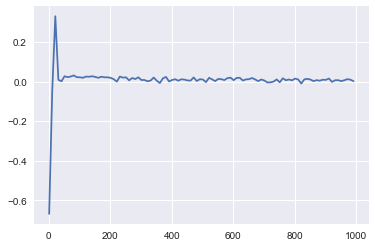

In [30]:
# Plot J_{n} - J^(Pi)
n_episodes, gaps = compute_gaps(env, policy, 1000, Tmax, np.array(v_q4))
plt.plot(n_episodes, gaps)
plt.show()

## Policy optimization 

The learning rate is chosen as a constant $\alpha = 0.1$.

Let's choose the best epsilon maximizing the cumulated rewards over the trajectories and minimizing the gap $||v^K - v^*||_\infty$ where $v^K$ is the last value function obtained.

In [31]:
# Run the Q learning algorithm for different value of epsilon
epsilons = [i*1e-1 for i in range(11)]
n_trajectories = 10000
alpha = 0.1

# Store the last cumulated rewards for each epsilon
last_cumulated_rewards = []
# Store the last greedy value function for each epsilon
last_value_functions = []

for epsilon in epsilons:
    Q, value_functions, greedy_policies, cumulated_rewards = \
    compute_Qlearning(env, n_trajectories, Tmax, epsilon, alpha)
    last_cumulated_rewards.append(cumulated_rewards[-1])
    last_value_functions.append(value_functions[-1])

100%|██████████| 10000/10000 [00:05<00:00, 1862.64it/s]


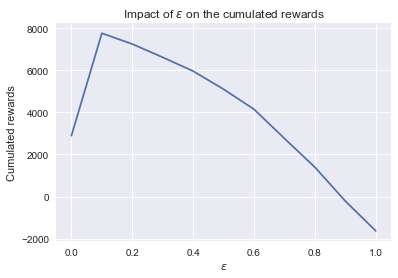

In [32]:
plt.plot(epsilons, last_cumulated_rewards)
plt.xlabel("$\epsilon$")
plt.ylabel("Cumulated rewards")
plt.title("Impact of $\epsilon$ on the cumulated rewards")
plt.show()

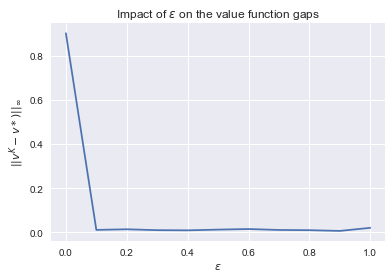

In [33]:
gaps = [norm(v-v_opt, np.inf) for v in last_value_functions]
plt.plot(epsilons, gaps)
plt.xlabel("$\epsilon$")
plt.ylabel("$||v^K - v*)||_\infty$")
plt.title("Impact of $\epsilon$ on the value function gaps")
plt.show()

> The two graphs show than an optimal value for $\epsilon$ should be **0.1**.

In [34]:
# Q learning with alpha = 0.1, epsilon = 0.1
n_trajectories = 10000
epsilons = 0.1
alpha = 0.1
Q, value_functions, greedy_policies, cumulated_rewards = \
compute_Qlearning(env, n_trajectories, Tmax, epsilon, alpha)

100%|██████████| 10000/10000 [00:05<00:00, 1818.84it/s]


In [35]:
# Vizualize the optimal policy
gui.render_policy(env, greedy_policies[-1])

In [36]:
# Vizualize the optimal Q policy
gui.render_q(env, Q_to_q(env, Q))

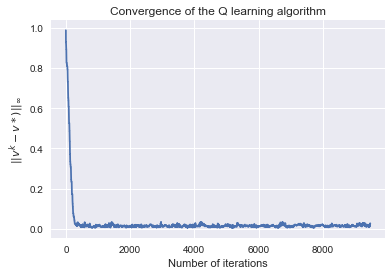

In [37]:
# Plot the convergence of the Q learning algorithm
gaps = [norm(v-v_opt, np.inf) for v in value_functions]
plt.plot(gaps)
plt.ylabel("$||v^k - v*)||_\infty$")
plt.xlabel("Number of iterations")
plt.title("Convergence of the Q learning algorithm")
plt.show()

The Q learning algorithm seems to converge after a thousand iterations (but there is some noise).

> The optimal policy of an MDP is not affected by the change of the initial distribution $\mu_{0}$ that draws the initial state at each iteration. In fact, if we explore more states that tend to give bad rewards, the policy leading to to those states won't be selected, and if we explore more states that then to give good rewards, the policy leading to those states will be priviliged (optimal policy).